In [2]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import *
from imblearn.metrics import specificity_score
from sklearn.metrics import confusion_matrix

In [3]:
#Importo los documentos csv que contiene la data
test_data = pd.read_csv(r"C:\Users\macar\OneDrive\Escritorio\REPOS_2\Proyecto-rbol-de-Decisi-n\data\processed\clean_test_diabetes.csv")
train_data = pd.read_csv(r"C:\Users\macar\OneDrive\Escritorio\REPOS_2\Proyecto-rbol-de-Decisi-n\data\processed\clean_train_diabetes.csv")

In [4]:
train_data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,2,84,0,0,0,0.0,0.304,21,0
1,9,112,82,24,0,28.2,1.282,50,1
2,1,139,46,19,83,28.7,0.654,22,0
3,0,161,50,0,0,21.9,0.254,65,0
4,6,134,80,37,370,46.2,0.238,46,1


In [5]:
#Defino las muestras de prueba y de entrenamiento
X_train = train_data.drop(["Outcome"], axis = 1)
y_train = train_data["Outcome"]

X_test = test_data.drop(["Outcome"], axis = 1)
y_test = test_data["Outcome"]

Voy a utilizar el algorimto por defecto para ver que resultado obtiene como mínimo

In [6]:
model = RandomForestClassifier(random_state = 42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [7]:
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

In [8]:
from función import get_metrics

get_metrics(y_train, y_test, y_pred_test= y_pred_test , y_pred_train= y_pred_train)

,Accuracy,F1,AUC,Precision,Recall,Specificity
Train,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000
Test,0.720779,0.612613,0.69798,0.607143,0.618182,0.777778
Diferencia,0.279221,0.387387,0.30202,0.392857,0.381818,0.222222


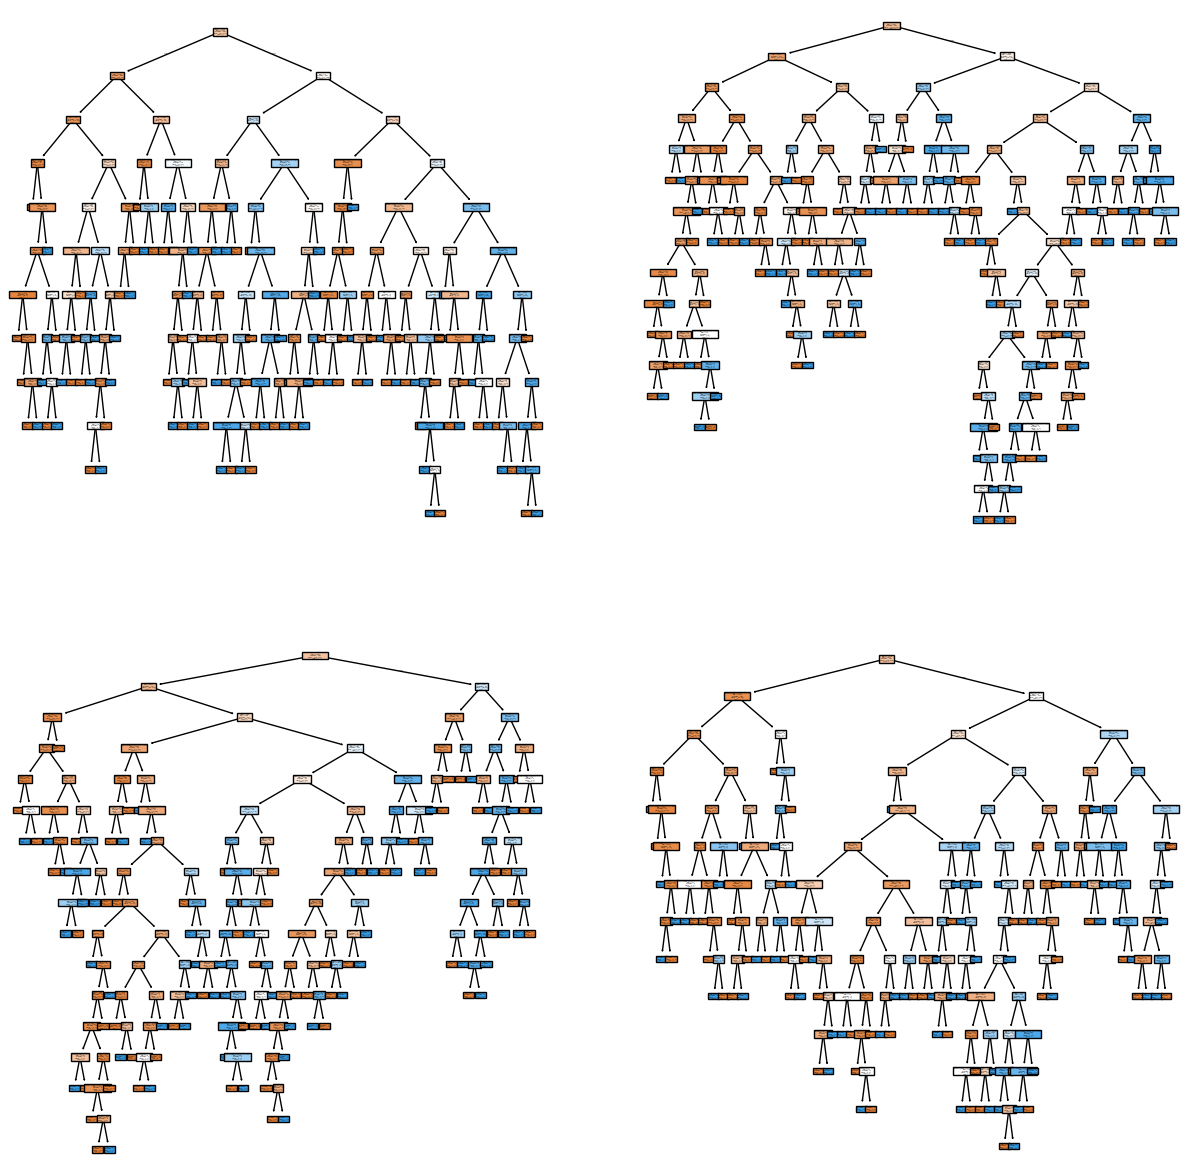

In [9]:
import matplotlib.pyplot as plt
from sklearn import tree

fig, axis = plt.subplots(2, 2, figsize = (15, 15))


tree.plot_tree(model.estimators_[0], ax = axis[0, 0], feature_names = list(X_train.columns), class_names = ["0", "1"], filled = True)
tree.plot_tree(model.estimators_[1], ax = axis[0, 1], feature_names = list(X_train.columns), class_names = ["0", "1"], filled = True)
tree.plot_tree(model.estimators_[2], ax = axis[1, 0], feature_names = list(X_train.columns), class_names = ["0", "1"], filled = True)
tree.plot_tree(model.estimators_[3], ax = axis[1, 1], feature_names = list(X_train.columns), class_names = ["0", "1"], filled = True)

plt.show()

In [10]:
model_custom_v1 = RandomForestClassifier(n_estimators= 50, max_depth= 20, min_samples_split= 5 , min_samples_leaf= 5,random_state = 42)
model_custom_v1.fit(X_train, y_train)
y_pred_train = model_custom_v1.predict(X_train)
y_pred_test = model_custom_v1.predict(X_test)

In [11]:
get_metrics(y_train, y_test, y_pred_test= y_pred_test , y_pred_train= y_pred_train)

,Accuracy,F1,AUC,Precision,Recall,Specificity
Train,0.905537,0.856436,0.883659,0.905759,0.812207,0.955112
Test,0.746753,0.642202,0.722222,0.648148,0.636364,0.808081
Diferencia,0.158784,0.214234,0.161437,0.257611,0.175843,0.147031


## Optimización del modelo

In [12]:
model_optimizado = RandomForestClassifier(random_state=42)

# Defino los hiperparámetros a probar en GridSearchCV
param_grid = {
    'criterion': ['gini', 'entropy'],  # Función de medida de la calidad de la división
    'max_depth': [10, 20, 30, 40, 50],  # Profundidad máxima del árbol
    'min_samples_split': [2, 5, 10, 15, 20],  # Número mínimo de muestras necesarias para dividir un nodo
    'min_samples_leaf': [2, 5, 10, 15, 20],  # Número mínimo de muestras necesarias en un nodo hoja
    'max_features': ['sqrt', 'log2', X_train.shape[1]//2]  # Número de características a considerar al buscar la mejor división
}

In [13]:
grid_search = GridSearchCV(estimator=model_optimizado, param_grid=param_grid, cv=10, scoring = 'accuracy', n_jobs=-1, verbose=1)

grid_search.fit(X_train, y_train)

Fitting 10 folds for each of 750 candidates, totalling 7500 fits


GridSearchCV(cv=10, estimator=RandomForestClassifier(random_state=42),
             n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [10, 20, 30, 40, 50],
                         'max_features': ['sqrt', 'log2', 4],
                         'min_samples_leaf': [2, 5, 10, 15, 20],
                         'min_samples_split': [2, 5, 10, 15, 20]},
             scoring='accuracy', verbose=1)

In [14]:
best_model = grid_search.best_estimator_

y_pred_train_best_model = best_model.predict(X_train)
y_pred_test_best_model = best_model.predict(X_test)

print(best_model)

RandomForestClassifier(max_depth=10, min_samples_leaf=5, min_samples_split=15,
                       random_state=42)


In [15]:
get_metrics(y_train, y_test, y_pred_train_best_model, y_pred_test_best_model)

,Accuracy,F1,AUC,Precision,Recall,Specificity
Train,0.894137,0.837905,0.869429,0.893617,0.788732,0.950125
Test,0.753247,0.654545,0.731313,0.654545,0.654545,0.808081
Diferencia,0.140890,0.183360,0.138115,0.239072,0.134187,0.142044


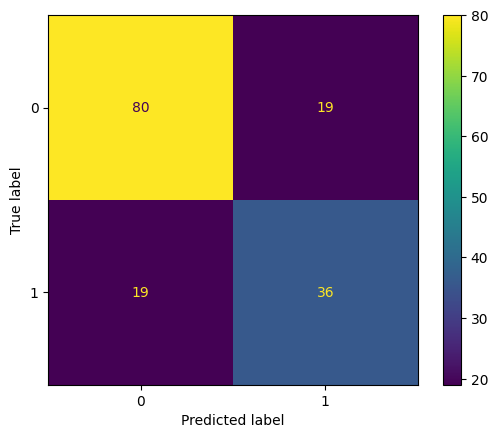

In [19]:
# Creo una matriz de confusión para ver más claros los resultados predichos
cm = confusion_matrix(y_test, y_pred=y_pred_test_best_model)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['0', '1'])
disp.plot()

Aunque por una parte el modelo optimizado no ha mejorado por mucho las métricas de precisón hemos conseguido una mejora. 

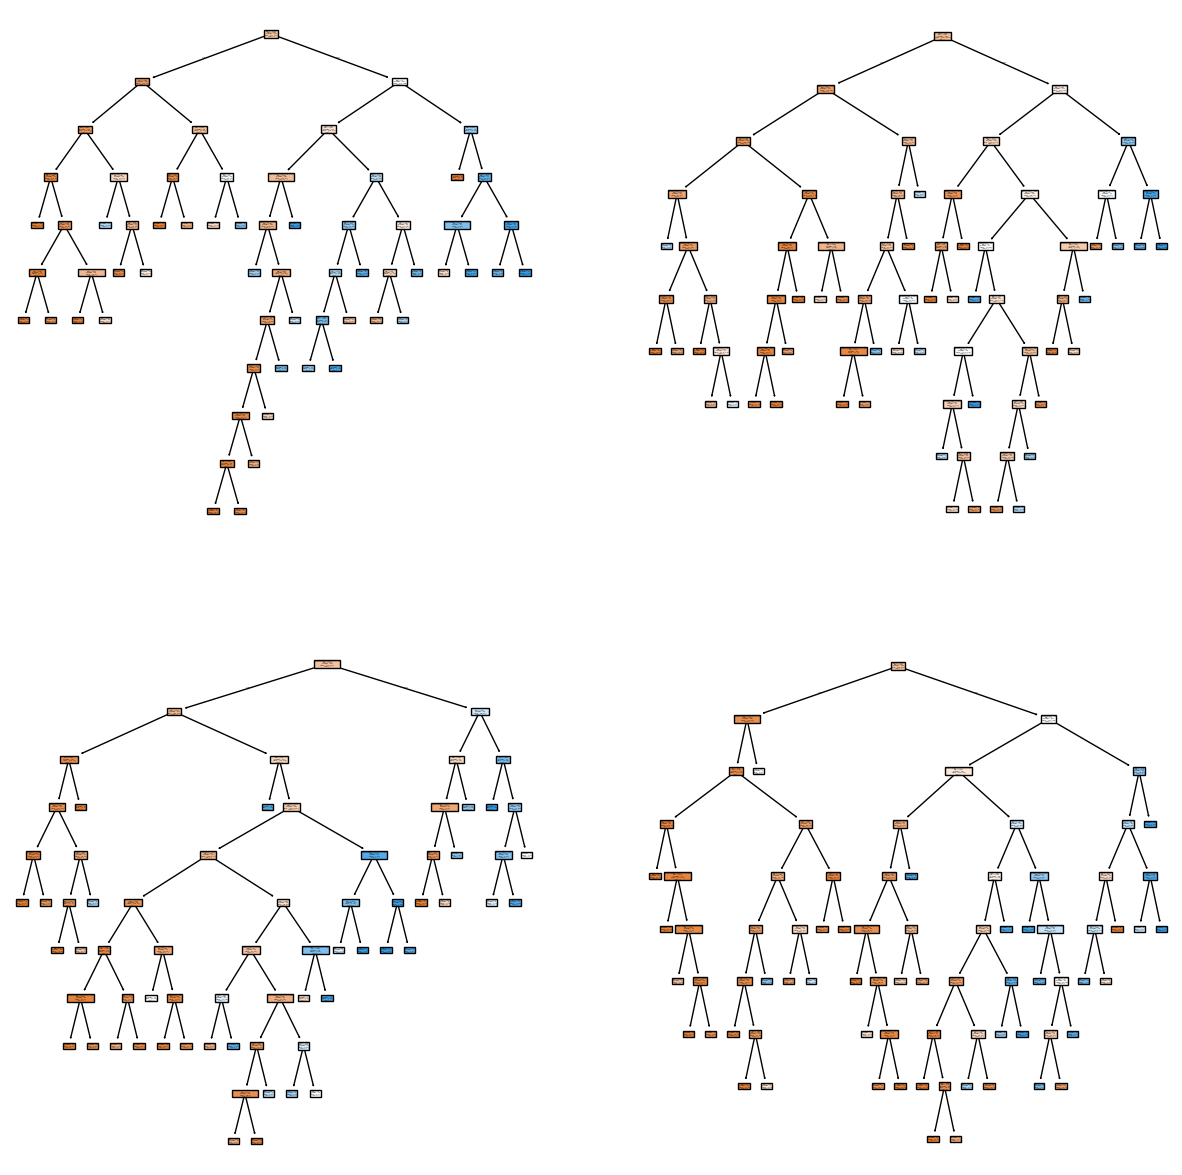

In [25]:
fig, axis = plt.subplots(2, 2, figsize = (15, 15))


tree.plot_tree(best_model.estimators_[0], ax = axis[0, 0], feature_names = list(X_train.columns), class_names = ["0", "1"], filled = True)
tree.plot_tree(best_model.estimators_[1], ax = axis[0, 1], feature_names = list(X_train.columns), class_names = ["0", "1"], filled = True)
tree.plot_tree(best_model.estimators_[2], ax = axis[1, 0], feature_names = list(X_train.columns), class_names = ["0", "1"], filled = True)
tree.plot_tree(best_model.estimators_[3], ax = axis[1, 1], feature_names = list(X_train.columns), class_names = ["0", "1"], filled = True)

plt.show()

In [26]:
#Almaceno el modelo
from pickle import dump

dump(best_model, open("../models/random_forest_crit-entro_maxdepth-10_min_samples_leaf=5, min_samples_split=15, rs = 42.sav", "wb"))